# CFD HW 1 -- Finite Differencing and Steady-state Advection-Diffusion Equations
## Kelsey Malloy

### <i>last edited: 09/2020</i>

In [2]:
import numpy as np
import numpy.linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt

### 1. Finite Difference Derivation

Use Taylor series to show that the 5th-order finite difference approximation to the first derivative using the stencils are of the form:
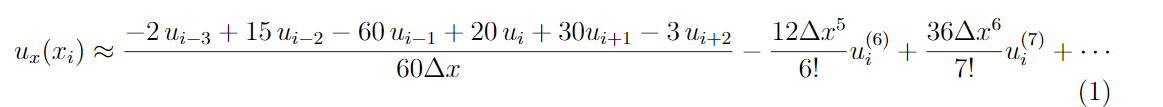

In [3]:
# B = m^q * Am
m = np.array([[-3.,  -2.,  -1., 1.,  2.],                                         
 [(-3.)**2, (-2.)**2, (-1.)**2, 1.**2,  2.**2],                                                 
 [(-3.)**3, (-2.)**3, (-1.)**3, 1.**3,  2.**3],                                                 
 [(-3.)**4, (-2.)**4, (-1.)**4, 1.**4,  2.**4],                                                 
 [(-3.)**5, (-2.)**5, (-1.)**5, 1.**5,  2.**5]])
print(m)

b = [[1],[0],[0],[0],[0]]
print(b)

a = LA.solve(m,b)
print(a)

[[  -3.   -2.   -1.    1.    2.]
 [   9.    4.    1.    1.    4.]
 [ -27.   -8.   -1.    1.    8.]
 [  81.   16.    1.    1.   16.]
 [-243.  -32.   -1.    1.   32.]]
[[1], [0], [0], [0], [0]]
[[-0.03333333]
 [ 0.25      ]
 [-1.        ]
 [ 0.5       ]
 [-0.05      ]]


The matrix shown above are the coefficients in decimal form, e.g. (-2/60, 15/60, -60/60, 30/60, -3/60).

### 2. Drawing the reference function and its exact derivative

Write a script to plot the following periodic functions on the cell edges using 1001 points.
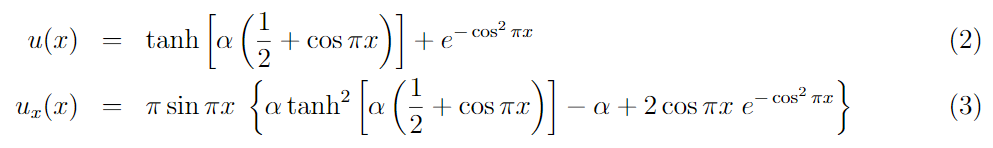
and plot the 2 curves using your favorite visualization tool.  Use alpha= 4.

In [37]:
# function that calculates f(x) and exact f'(x)

def func(x,alpha):
    result = np.tanh(alpha*(0.5+np.cos(np.pi*x))) + np.exp(-1*np.cos(np.pi*x)**2)
    return result

def dfunc(x,alpha):
    result = np.pi*np.sin(np.pi*x)*(alpha*np.tanh(alpha*(0.5+np.cos(np.pi*x)))**2 - alpha + 2.*np.cos(np.pi*x)*np.exp(-1.*np.cos(np.pi*x)**2))
    return np.longdouble(result)

In [52]:
# setting up the grid
xmin,xmax=-1,1
nx=1001
xpts = np.linspace(xmin,xmax,nx)
print(xpts,len(xpts))

alpha=4

[-1.    -0.998 -0.996 ...  0.996  0.998  1.   ] 1001


In [53]:
f = func(xpts,alpha)
df = dfunc(xpts,alpha)

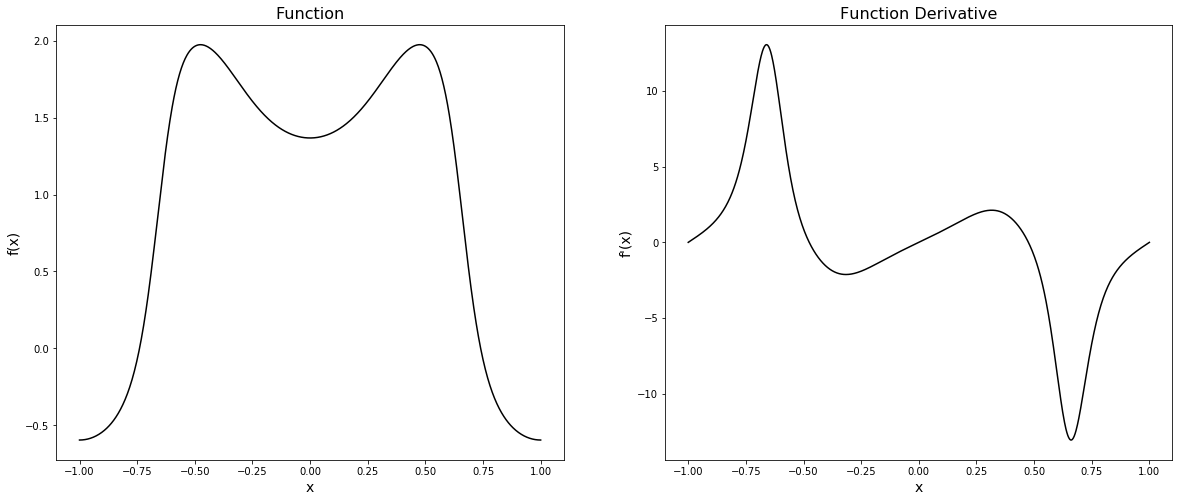

In [54]:
fig = plt.figure(figsize=[20,8])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(xpts,f,'k')
ax1.set_xlabel('x',fontsize=14)
ax1.set_ylabel('f(x)',fontsize=14)
ax1.set_title('Function',fontsize=16)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(xpts,df,'k')
ax2.set_xlabel('x',fontsize=14)
ax2.set_ylabel('f\'(x)',fontsize=14)
ax2.set_title('Function Derivative',fontsize=16)

plt.show()

### 3. Programming Finite Difference Calculations

Write a program to implement the numerical differentiation formula 
1. Apply it to the function defined in equation 
2. Use the exact derivative, equation 3, to validate your work and to confirm the convergence rates predicted by the Taylor series by drawing the convergence diagram of the RMSE and max error.

In [41]:
# function that calculate the central differencing of 2nd, 4th, and 5th order

def cd(func_values,dx,order,periodic):
    N = len(func_values)
    deriv_estimate=np.empty((N),dtype=np.longdouble)
    
    # NOTE: python does NOT include the endpt when slicing, indexing begins at 0
    
    if order == 2: # 2nd order centered difference
        deriv_estimate[1:-1] = (func_values[2:]-func_values[:-2]) / (2*dx)                           
        if periodic==1: # handling edges
            deriv_estimate[0] = (func_values[1]-func_values[-2]) / (2*dx) 
            deriv_estimate[-1] = (func_values[1]-func_values[-2]) / (2*dx)

    elif order == 4: # 4th order centered difference
        deriv_estimate[2:-2] = (8*(func_values[3:-1]-func_values[1:-3]) - (func_values[4:]-func_values[:-4])) / (12*dx)
        if periodic==1: # handling edges
            deriv_estimate[1] = (8*(func_values[2]-func_values[0]) - (func_values[3]-func_values[-2])) / (12*dx)
            deriv_estimate[0] = (8*(func_values[1]-func_values[-2]) - (func_values[2]-func_values[-3])) / (12*dx)
            deriv_estimate[-2] = (8*(func_values[-1]-func_values[-3]) - (func_values[1]-func_values[-4])) / (12*dx)
            deriv_estimate[-1] = (8*(func_values[1]-func_values[-2]) - (func_values[2]-func_values[-3])) / (12*dx)
    
    elif order == 5: # 5th order centered difference
        deriv_estimate[3:-2] = (-2*func_values[:-5] + 15*func_values[1:-4]
                                -60*func_values[2:-3] + 20*func_values[3:-2] 
                                + 30*func_values[4:-1] - 3*func_values[5:]) / (60*dx)
        if periodic==1:
            deriv_estimate[2] = (-2*func_values[-2] + 15*func_values[0]
                                -60*func_values[1] + 20*func_values[2]
                                 + 30*func_values[3] - 3*func_values[4] ) / (60*dx)
            deriv_estimate[1] = (-2*func_values[-3] + 15*func_values[-2]
                                -60*func_values[0] + 20*func_values[1]
                                +30*func_values[2] - 3*func_values[3]) / (60*dx)
            deriv_estimate[0] = (-2*func_values[-4] + 15*func_values[-3]
                                -60*func_values[-2] + 20*func_values[0]
                                +30*func_values[1] - 3*func_values[2]) / (60*dx)
            deriv_estimate[-1] = (-2*func_values[-4] + 15*func_values[-3]
                                -60*func_values[-2] + 20*func_values[-1]
                                +30*func_values[1] - 3*func_values[2]) / (60*dx)
            deriv_estimate[-2] = (-2*func_values[-5] + 15*func_values[-4]
                                -60*func_values[-3] + 20*func_values[-2]
                                +30*func_values[-1] - 3*func_values[1]) / (60*dx)

    else:
        print('Please check order for centered difference')
        
    return np.array(deriv_estimate)

In [47]:
# function that does plotting 

def plot_iteration(order,num_pts):
    fig = plt.figure(figsize=[15,12])
    st = fig.suptitle('Finite Differencing',fontsize=20)

    ax1 = fig.add_subplot(2,2,1)
    ax1.plot(xpts,func_values,'k')
    ax1.set_xlabel('x',fontsize=14)
    ax1.set_ylabel('sin(x*pi)',fontsize=14)
    ax1.set_title('Function',fontsize=16)

    ax2 = fig.add_subplot(2,2,2)
    if order==orders[0]:
        ax2.plot(xpts,error,'b')
    else:
        ax2.plot(xpts,error,'r')
    ax2.set_xlabel('x',fontsize=14)
    ax2.set_ylabel('$\epsilon$',fontsize=14)
    ax2.set_title('Error of finite diff scheme',fontsize=16)

    ax3 = fig.add_subplot(2,2,3)
    if order==orders[0]:
        if len(orders)>1:
            ax3.scatter(NX, RMS,c='b',marker='o')
            if n>0:
                ax3.plot(NX, RMS,c='b')
        else:
            ax3.scatter(NX, RMS,c='r',marker='o',label=str(orders[-1])+'-order')
            if n>0:
                ax3.plot(NX, RMS,c='r')
    else:
        ax3.scatter(NX, RMS,c='r',marker='o',label=str(orders[-1])+'-order')
        ax3.scatter(NXarchive, RMSarchive,c='b',marker='o',label=str(orders[0])+'-order')
        ax3.plot(NXarchive, RMSarchive,c='b',marker='o')
        if n>0:
            ax3.plot(NX, RMS,c='r')
    ax3.set_xlabel('# of grid cells',fontsize=14)
    ax3.set_ylabel('RMS',fontsize=14)
    ax3.set_yscale('log')
    ax3.set_xscale('log')
    ax3.set_ylim([10**-14,10**2])
    ax3.set_xlim([10**0,10**4])
    ax3.set_title('Convergence Rate',fontsize=16)
    
    if num_pts == nx[-1] and order==orders[-1]:
        slope= np.polyfit(np.log(NX[2:]),np.log(RMS[2:]),1)[0]
        
        if len(orders)>1:
            ax3.text(.15, 0.15, str(orders[0])+'-order (log) slope: '+"{:.2f}".format(slope_archive)+'\n'+str(orders[-1])+'-order (log) slope: '+"{:.2f}".format(slope),
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax3.transAxes)
            ax3.legend(loc=0) # show legend for final figure
        else:
            ax3.text(.15, 0.15, str(orders[0])+'-order (log) slope: '+"{:.2f}".format(slope_archive),
                    horizontalalignment='left',
                    verticalalignment='top',
                    transform=ax3.transAxes)
        
    ax4 = fig.add_subplot(2,2,4)
    if order==orders[0]:
        if len(orders)>1:
            ax4.scatter(NX, MAXERR,c='b',marker='o')
            if n>0:
                ax4.plot(NX, MAXERR,c='b')
        else:
            ax4.scatter(NX, MAXERR,c='r',marker='o')
            if n>0:
                ax4.plot(NX, MAXERR,c='r')
    else:
        ax4.scatter(NX, MAXERR,c='r',marker='o',label=str(orders[-1])+'-order')
        ax4.scatter(NXarchive, MAXERRarchive,c='b',marker='o',label=str(orders[0])+'-order')
        ax4.plot(NXarchive, MAXERRarchive,c='b',marker='o')
        if n>0:
            ax4.plot(NX, MAXERR,c='r')
    ax4.set_xlabel('# of grid cells',fontsize=14)
    ax4.set_ylabel('Max Error',fontsize=14)
    ax4.set_yscale('log')
    ax4.set_xscale('log')
    ax4.set_ylim([10**-14,10**2])
    ax4.set_xlim([10**0,10**4])
    ax4.set_title('Convergence Rate',fontsize=16)

In [45]:
# setting up the grid
xmin,xmax=-1,1

#nx=[10,20,40,80,100,200,400,800,1600,3200]
nx=[10,20,40,80,160,320,640,1280,2560,5120]
print(nx)

nx=np.array(nx)
dxx = (xmax-xmin) / nx
print(dxx)

alpha=4
periodic=1
orders=[5]

[10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120]
[0.2        0.1        0.05       0.025      0.0125     0.00625
 0.003125   0.0015625  0.00078125 0.00039063]


order: 5


# pts, spacing: 10, 0.2
RMS for dx=0.2: 1.068217151270101
Max Error for dx=0.2: 3.9093795193458605


# pts, spacing: 20, 0.1
RMS for dx=0.1: 0.16819969511806665
Max Error for dx=0.1: 1.0234764182097873


# pts, spacing: 40, 0.05
RMS for dx=0.05: 0.022753191940592242
Max Error for dx=0.05: 0.243547379718283


# pts, spacing: 80, 0.025
RMS for dx=0.025: 0.0008403368441871064
Max Error for dx=0.025: 0.013575088050474804


# pts, spacing: 160, 0.0125
RMS for dx=0.0125: 2.193518281776509e-05
Max Error for dx=0.0125: 0.0005456723071048941


# pts, spacing: 320, 0.00625
RMS for dx=0.00625: 5.066831851560882e-07
Max Error for dx=0.00625: 1.824969147712352e-05


# pts, spacing: 640, 0.003125
RMS for dx=0.003125: 1.1323166024267914e-08
Max Error for dx=0.003125: 5.774570848160465e-07


# pts, spacing: 1280, 0.0015625
RMS for dx=0.0015625: 2.509183624098665e-10
Max Error for dx=0.0015625: 1.8123579081930075e-08


# pts, spacing: 2560, 0.00078125
RMS for dx=0.00078125: 5.548545192881541

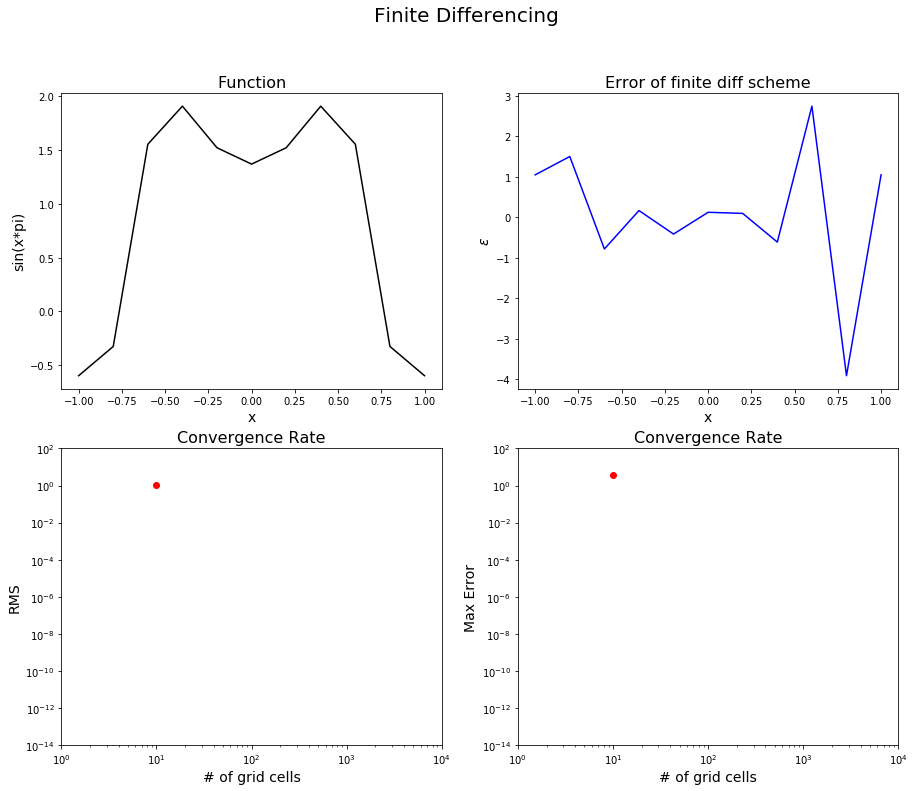

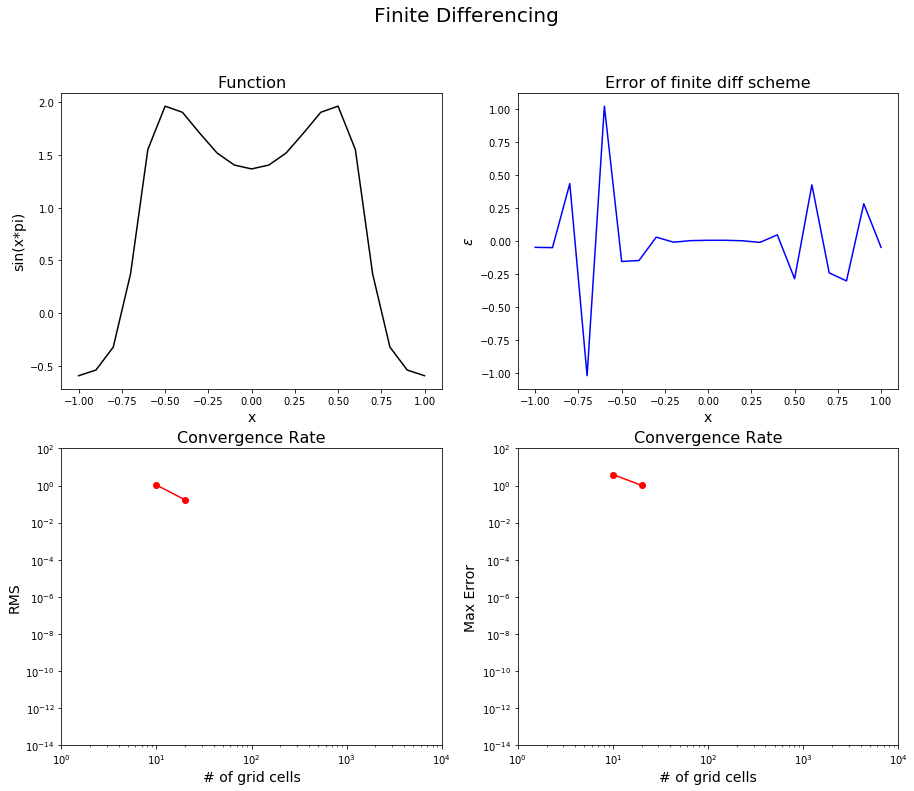

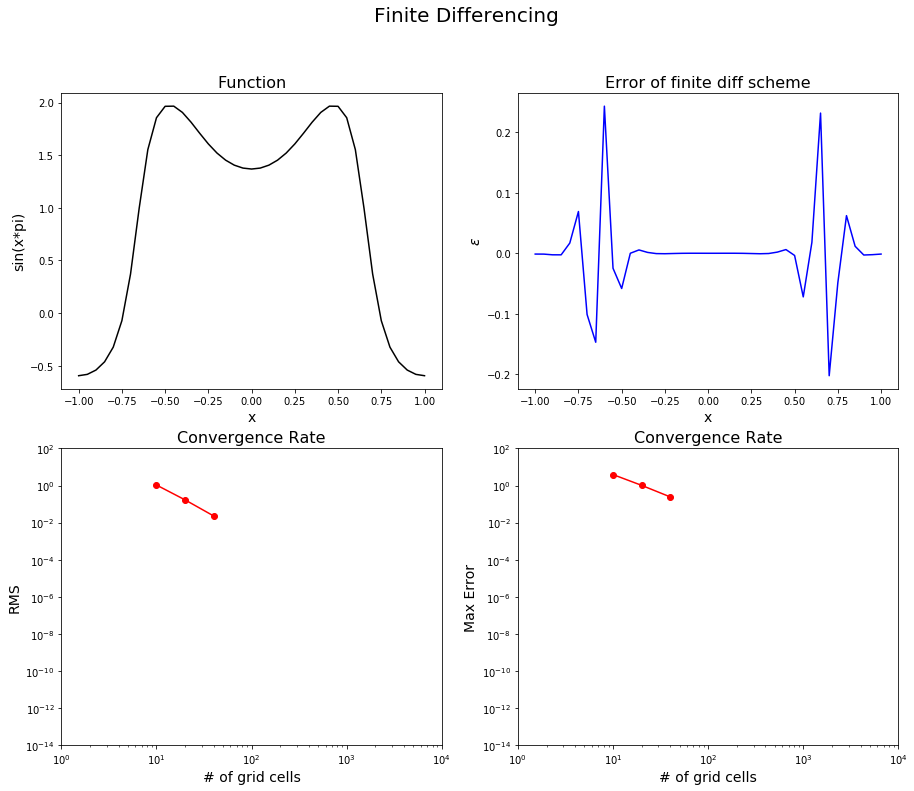

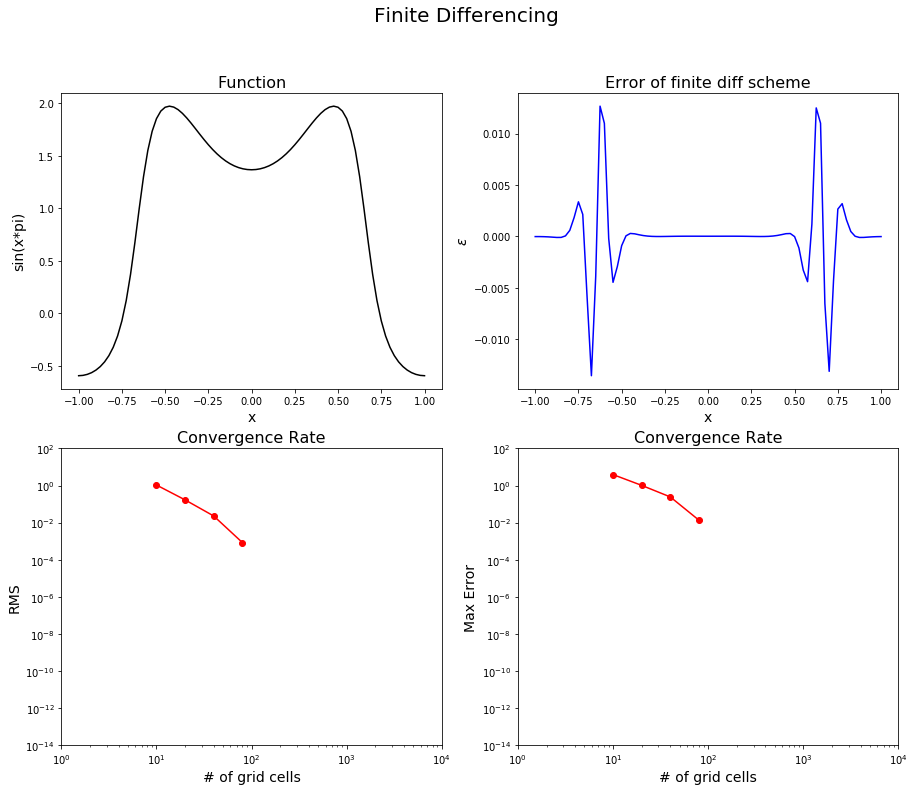

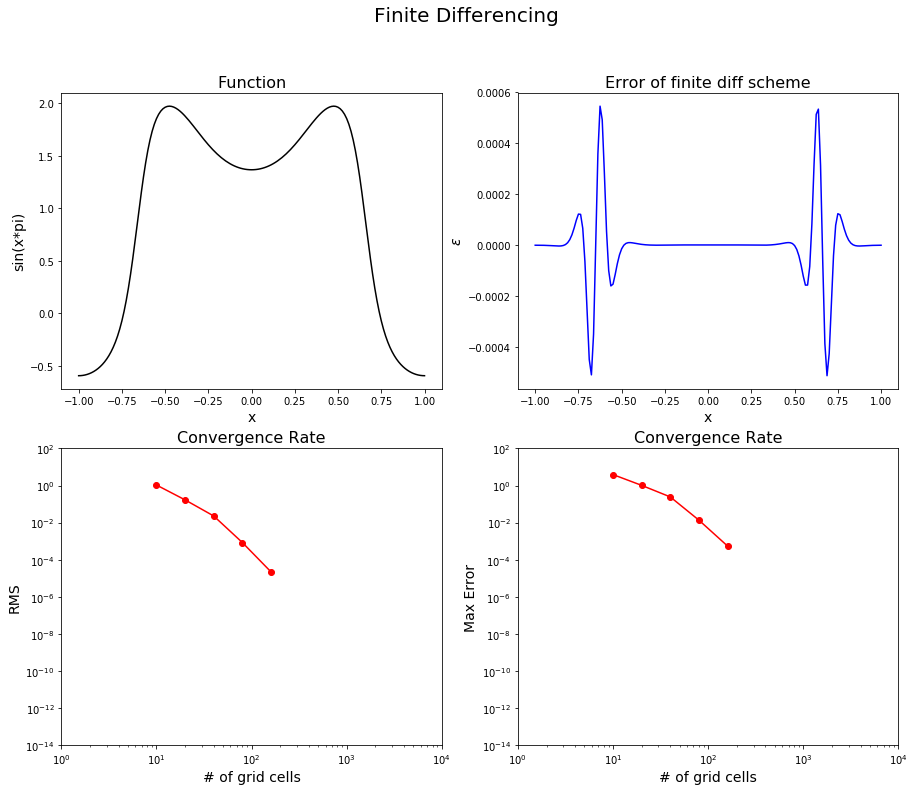

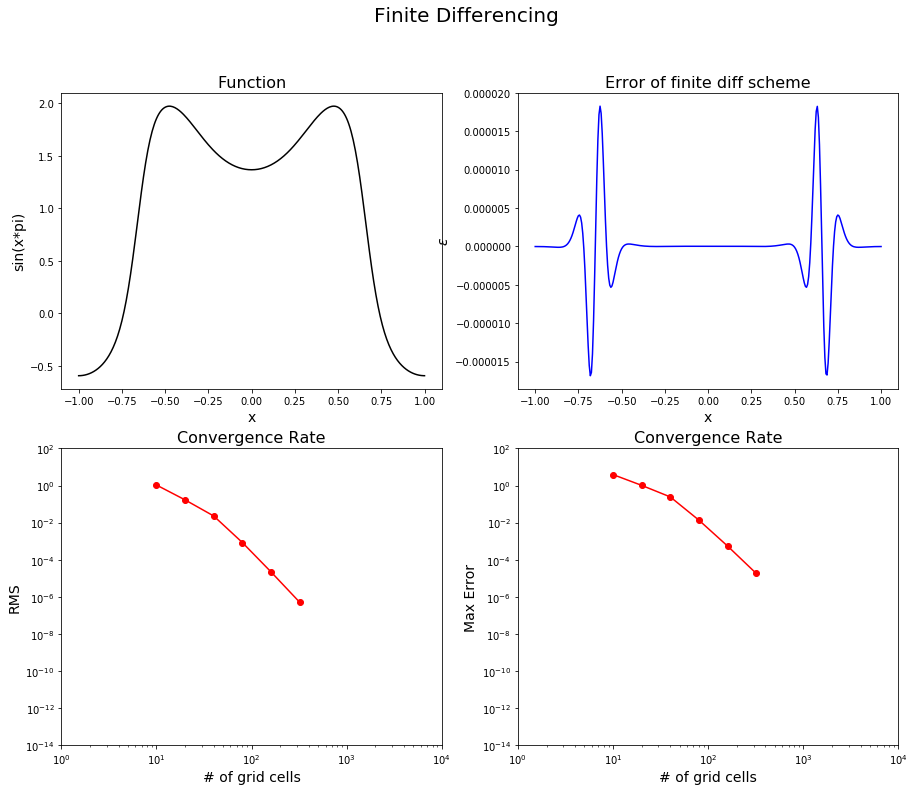

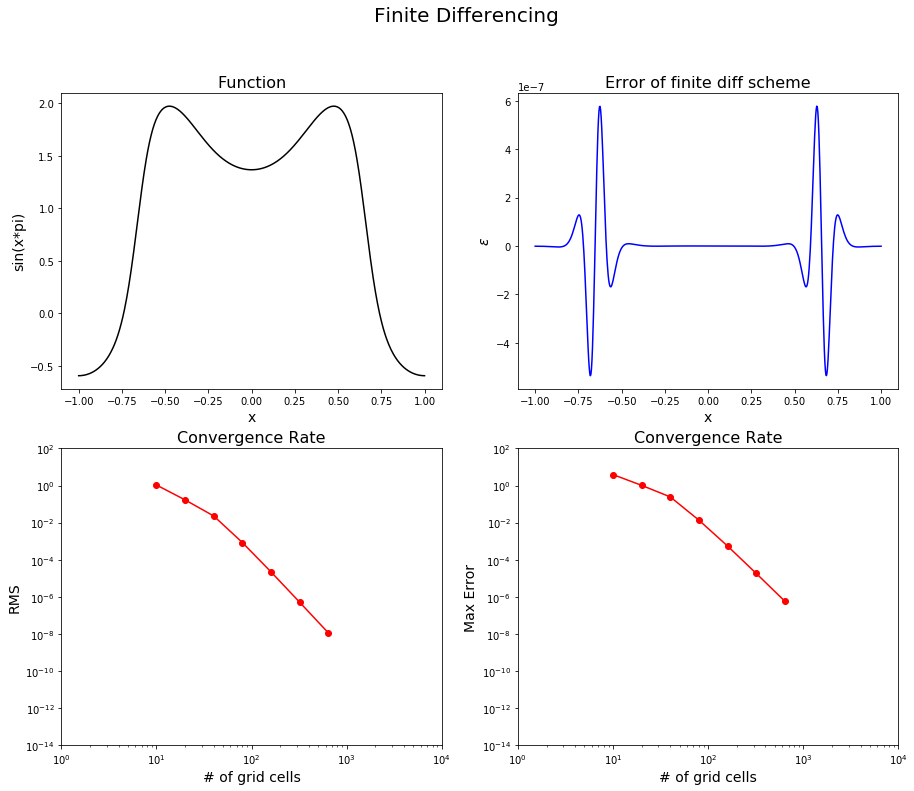

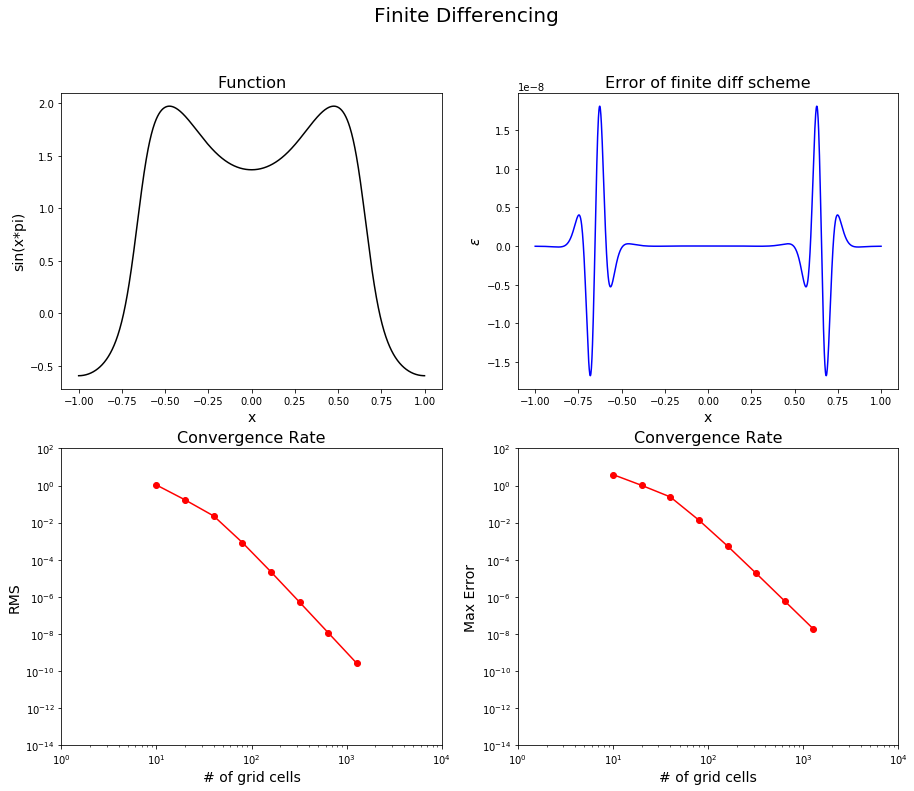

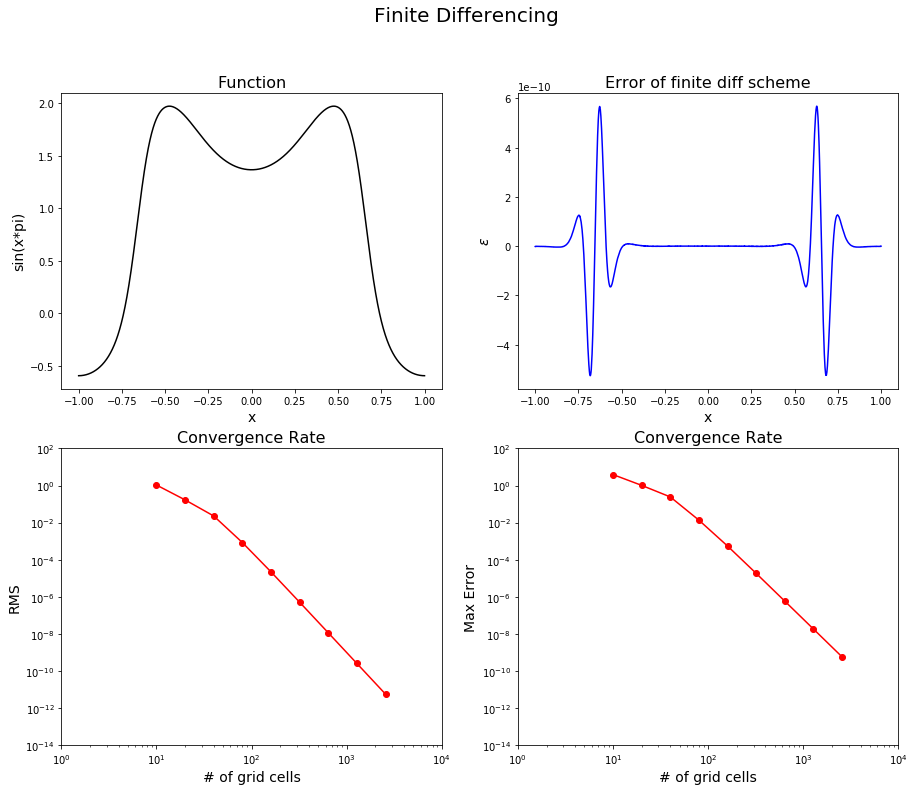

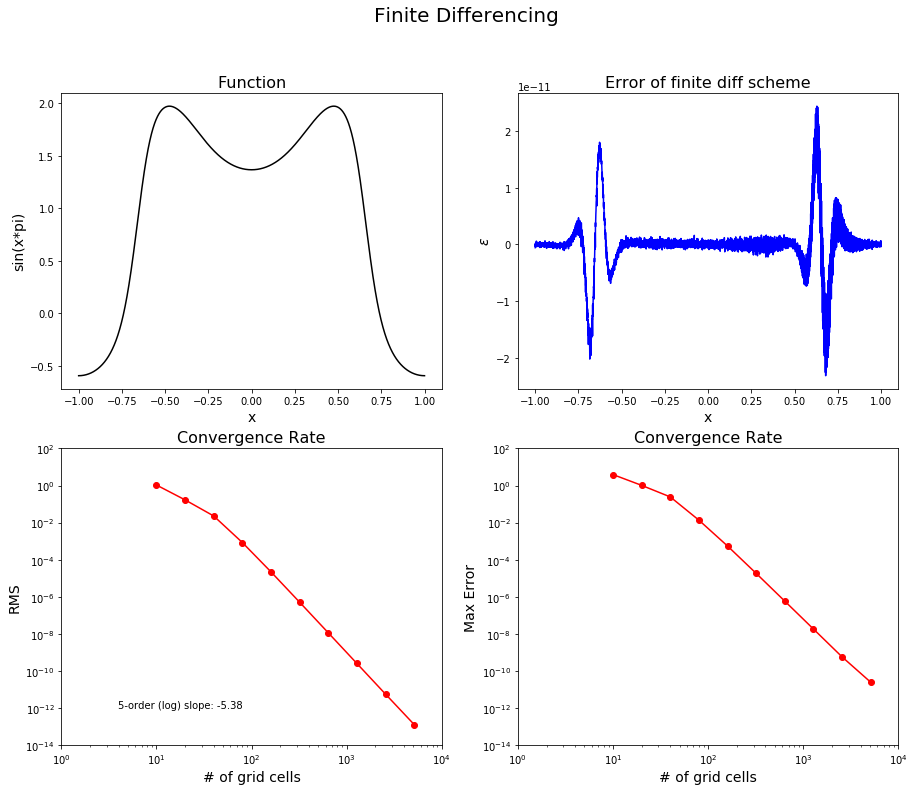

In [48]:
for order in orders: # loop through order
    print('order: '+str(order)+'\n\n')
    
    RMS,NX,MAXERR=[],[],[]
    for n,num_pts in enumerate(nx): # loop through # of gridpts/ spacing
        dx = dxx[n] # grid cell spacing
        print('# pts, spacing: '+str(num_pts)+', '+str(dx))   
        xpts = np.arange(xmin,xmax+dx,dx) # cell edges included
        #xpts = np.linspace(xmin,xmax,num_pts)

        # fill in values of function
        func_values = func(xpts,alpha)

        # compute exact derivative
        deriv_exacts = dfunc(xpts,alpha)

        # compute derivative estimate using centered diff scheme
        deriv_estimates = cd(func_values,dx,order,periodic)

        # compute RMS error between exact deriv & estimate from centered diff
        error = (deriv_estimates-deriv_exacts)    
        RMS.append(np.sqrt(np.sum(error**2))*dx)
        MAXERR.append(np.max(np.abs(error)))
        NX.append(num_pts)
        print('RMS for dx='+str(dx)+': '+str(RMS[n]))
        print('Max Error for dx='+str(dx)+': '+str(MAXERR[n])+'\n\n')
        
        # save the 2nd order line to plot with 4th order
        if order==orders[0] and n==(len(nx)-1):
            RMSarchive=RMS
            NXarchive=NX
            MAXERRarchive=MAXERR
            slope_archive = np.polyfit(np.log(NX[2:]),np.log(RMS[2:]),1)[0]
    
        # PLOTTING 
        plot_iteration(order,num_pts)

plt.savefig('FinDiff_HW1_#3.png')

The convergence rate does not reach its expected slope until 10<sup>2</sup> # of grid cells. This is because our # of grid cells is not able to capture the exact derivative accurately yet (resolution issue).

### 4. Steady-State Advection-Diffusion equation

The steady state advection diffusion equation is:<br>
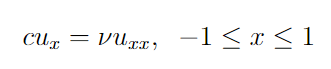
<br>where c is the wind velocity, and ν is a diffusion coefficients, c and ν are both assumed to beknown positive constants. The boundary conditions are u(−1) = 0 and u(1) = 1.

Write down the finite difference approximation of the differential equation using 2nd order centered derivatives for ux and uxx.  Show that the difference form leads to a tridiagonal system of equations for the interior unknowns of the form:<br>
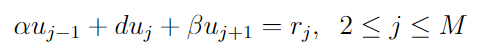
<br>where M+1 is the number of discrete points on the computational grids. Give the expression for the sub-diagonal term α, diagonal termd, super-diagonal term β and the right hand side rj.  Discuss how you would handle the boundary conditions (Hint:  Count the actual number of unknowns you need to solve for.)